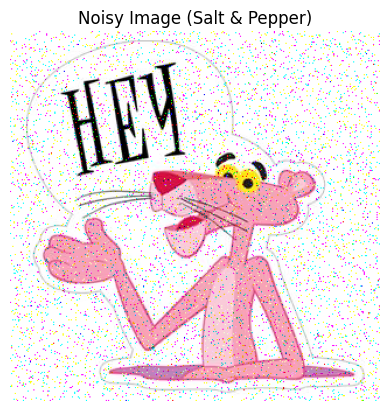

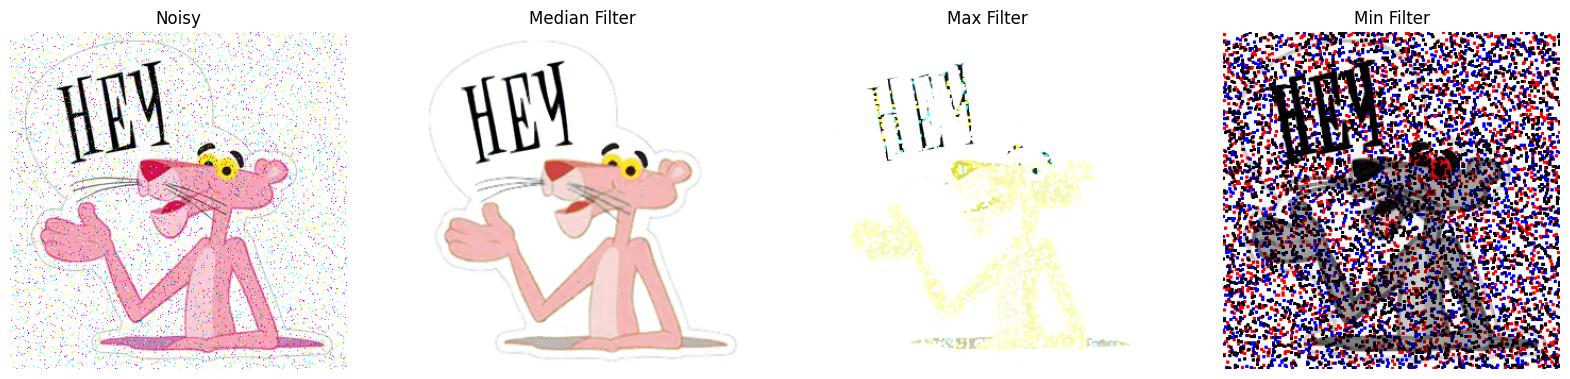

PSNR Median Filter: 26.3715928005349
PSNR Max Filter: 15.193700839531356
PSNR Min Filter: 4.2883921792258315


In [ ]:
import os
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt

from skimage.util import random_noise
from scipy.ndimage import median_filter, maximum_filter, minimum_filter
from skimage.metrics import peak_signal_noise_ratio as psnr

input_folder = 'Exercise'
output_folder = 'Exercise_Output'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
        filepath = os.path.join(input_folder, filename)
        img = iio.imread(filepath)

noisy_image = random_noise(img, mode='s&p', amount=0.05)
noisy_image = (noisy_image * 255).astype(np.uint8)

plt.imshow(noisy_image)
plt.title("Noisy Image (Salt & Pepper)")
plt.axis('off')
plt.show()

median_filtered = median_filter(noisy_image, size=3)
max_filtered = maximum_filter(noisy_image, size=3)
min_filtered = minimum_filter(noisy_image, size=3)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
titles = ['Noisy', 'Median Filter', 'Max Filter', 'Min Filter']
images = [noisy_image, median_filtered, max_filtered, min_filtered]

for i in range(4):
    axs[i].imshow(images[i])
    axs[i].set_title(titles[i])
    axs[i].axis('off')

plt.show()

original = iio.imread('Exercise/anh.jpg')

iio.imwrite('Exercise_Output/anh-median.jpg', median_filtered)
iio.imwrite('Exercise_Output/anh-max.jpg', max_filtered)
iio.imwrite('Exercise_Output/anh-min.jpg', min_filtered)

print("PSNR Median Filter:", psnr(original, median_filtered))
print("PSNR Max Filter:", psnr(original, max_filtered))
print("PSNR Min Filter:", psnr(original, min_filtered))





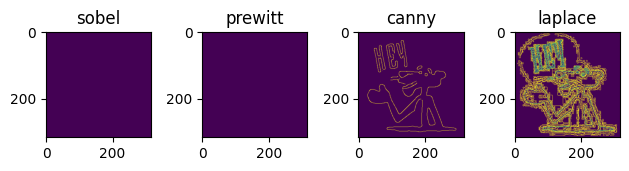

: 

In [ ]:
import os
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import scipy.ndimage as sn

from skimage import filters
from skimage import feature

input_folder = 'Exercise'
output_folder = 'Exercise_Output'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
        filepath = os.path.join(input_folder, filename)
        img = iio.imread(filepath, mode='L')

median_filtered = sn.median_filter(img, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0) 
iio.imwrite('anhkhunhieu.jpg', median_filtered)   

img2 = iio.imread('anhkhunhieu.jpg')

sobel = filters.sobel(img2).astype(np.uint8)
prewitt = filters.prewitt(img2).astype(np.uint8)
canny = feature.canny(img2, sigma=3).astype(np.uint8)
laplace = sn.laplace(img2,mode='reflect').astype(np.uint8)


plt.subplot(1, 4, 1)
iio.imsave('Exercise_Output/anh-sobel.jpg', sobel)
plt.title('sobel')
plt.imshow(sobel)  

plt.subplot(1, 4, 2)
iio.imsave('Exercise_Output/anh-prewitt.jpg', prewitt)
plt.title('prewitt')
plt.imshow(prewitt) 

plt.subplot(1, 4, 3)
iio.imsave('Exercise_Output/anh-canny.jpg', canny)
plt.title('canny')
plt.imshow(canny)

plt.subplot(1, 4, 4)
iio.imsave('Exercise_Output/anh-laplace.jpg',laplace)
plt.title('laplace')
plt.imshow(laplace) 

plt.tight_layout()
plt.show()



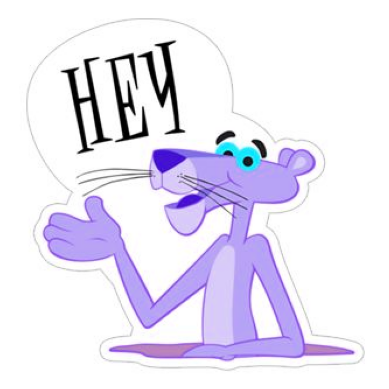

In [ ]:
#làm đk hoán màu ngẫu nhiênnhiên

import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
rgb = iio.imread('Exercise/anh.jpg')

random = [0,1,2]
np.random.shuffle(random)

random_rgb = rgb[:,:,random]

iio.imwrite('Exercise/anh-rgb-random.jpg', random_rgb)

plt.imshow(random_rgb)
plt.axis('off')
plt.show()

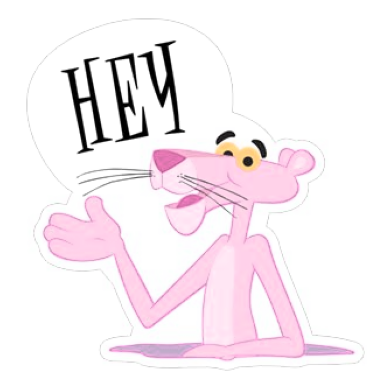

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
from matplotlib import colors
import os

image = iio.imread('Exercise/anh.jpg')

image_float = image / 255.0

hsv_image = colors.rgb_to_hsv(image_float)

hue_shift = np.random.uniform(-0.1, 0.1)         # Hue ∈ [0,1]
sat_scale = np.random.uniform(0.5, 1.5)
val_scale = np.random.uniform(0.5, 1.5)

hsv_image[:, :, 0] = (hsv_image[:, :, 0] + hue_shift) % 1.0  # Hue wrap-around
hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * sat_scale, 0, 1)
hsv_image[:, :, 2] = np.clip(hsv_image[:, :, 2] * val_scale, 0, 1)

random_rgb = colors.hsv_to_rgb(hsv_image)

random_rgb_uint8 = (random_rgb * 255).astype(np.uint8)
random_rgb = colors.hsv_to_rgb(hsv_image)
random_rgb_uint8 = (random_rgb * 255).astype(np.uint8)

iio.imwrite('Exercise/anh-hsv-random.jpg',random_rgb_uint8)
iio.imsave('Exercise/anh-hsv-random.jpg',random_rgb_uint8)

plt.imshow(random_rgb)
plt.axis("off")
plt.show()
